<a href="https://colab.research.google.com/github/jgp20/HCSPD2024/blob/main/Actividades_Clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación numérica de un avión en piloto automático

Esquema simplificado y en un punto de operación de un avión:

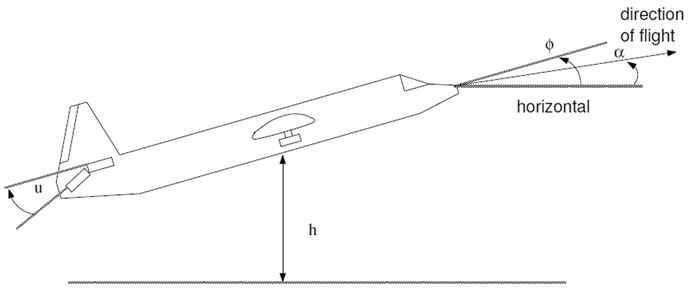

Para el caso de la figura, modelo válido sólo para pequeños ángulos, se tiene las ecuaciones
<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
\ \dot{\alpha}(t)=a(\phi(t) -\alpha(t))  \\
\ \ddot{\phi}(t) = -\omega ^2 (\phi (t)-\alpha (t) -b \cdot u(t)) \\
\ \dot{h}(t)=c \cdot \alpha (t)
\end{cases}
\end{equation*} \tag*{}$

donde $\omega >0$ al igual que $a$ y $b$.

donde $\omega$>0 representa la frecuencia natural, y los coeficientes a b son constantes positivas, u es la variable manipulada y es proporcional a la posición de los elevadores,$\phi$
 (ángulo de cabeceo) en radianes, vuela a c metros por segundo, su trayectoria de
vuelo forma un ángulo $\alpha$ con la horizontal (si $\alpha$>0 sube, si $\alpha$<0 desciende) Elegir x1=$\alpha$, x2=$\phi$, x3=$\dot\phi$ y x4=h.

$\begin{equation*}
\begin{cases}
\ \dot{x1}(t)=a(x2(t) -x1(t))  \\
\ \dot{x2}(t) = x3 \\
\ \dot{x3}(t) = -\omega ^2 (x2 (t)- x1(t) -b \cdot u(t)) \\
\ \dot{x4}(t)=c \cdot x1(t)
\end{cases}
\end{equation*}$

$\dot{x}$ = A x + B u

A = [ -a , a , 0 , 0 ; 0 , 0 , 1 , 0 ; w^2 , -w^2 , 0 , 0 ; c , 0 , 0 , 0 ]

B = [ 0 ; 0 ; w^2*b ; 0]



In [ ]:
# !apt-get update #Usar para actualizar librerias, únicamente

In [ ]:
!apt install octave #Instala colab en el entorno de trabajo

# SOLUCION NUMERICA - 1
$\omega$=0,2; a=0,01; b=2; c=100 m/s, (es decir, 360Km/h),
$\Delta$t=10-3; y el tiempo de simulación de 5 segundos

In [26]:
%%writefile Avion_Num_1.m
clc;clear all;
warning('off','all');
X=-[0; 0;0;0];t_etapa=10e-3;
tF=5;
color_='r';
color='b';
Ts=t_etapa;
u=1;
ii=0;
for t=0:t_etapa:tF
  ii=ii+1;
  x2(ii)=X(2);%Ángulo fi
  x4(ii)=X(4);%Altura del avión, con respecto altura crucero
  X=modavion_1(t_etapa, X, u);
  acc(ii)=u;
end
t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(3,1,1);hold on;
plot(t,x2,color_);title('x_2 angulo fi'); hold on;
subplot(3,1,2);hold on;
plot(t,x4,color_);title('x_4 Altura');
subplot(3,1,3);hold on;
plot(t,acc,color_);title('Entrada u_t, v_a');
xlabel('Tiempo [Seg.]');
print(hfig1,'VarsAvion_temporal_1','-r300','-dpng');
save('Verificacion_Num_1Avion_1.mat','-v7');

Overwriting Avion_Num_1.m


In [27]:
%%writefile modavion_1.m
%Funcion modelo
function [X]=modavion_1(t_etapa, xant, accion)
%xant=[alfa,fi,fi_p,h] -> [x1,x2,x3,x4]
a=0.01; b=2; c=100;
omega=0.2;
At=1e-3;
u=accion;
%xant=[alfa,fi,fi_p,h] -> [x1,x2,x3,x4]
%alfa=xant(1);
%x1=xant(1);
%fi=xant(2);
%x2=xant(2);
%fi_p=xant(3);
%x3=xant(3);
%h=xant(4);
%x4=xant(4):
x=xant;
for ii=1:t_etapa/At
  %xp=A*x+B*u;
  %alfa_p=a*(fi-alfa);
  % x1_p = a*(x2 - x1);
  % x2_p = x3;
  %fi_pp=(-omega^2)*(fi-alfa-b*u);
  % x3_p = (-omega^2)*(x2-x1-b*u);
  %h_p=c*alfa;
  % x4 = c*x1;
  A = [ -a , a , 0 , 0 ; 0 , 0 , 1 , 0 ; omega^2 , -omega^2 , 0 , 0 ; c , 0 , 0 , 0 ];
  B = [ 0 ; 0 ; omega^2*b ; 0];
  %xp=[alfa_p;fi_p;fi_pp;h_p];
  % xp = [x1_p;x2_p;x3_p;x4_p];
  xp = A * x + B * u;
  x=x+xp*At;
  %fi_p=xp(2);
  %alfa=x(1);
  %fi=x(2);
  %fi_p=x(3);
  %h=x(4);
end
X=[x]; %

Overwriting modavion_1.m


In [28]:
# -W : no window system
!octave -W Avion_Num_1.m
# import scipy.io
# mat = scipy.io.loadmat('/content/Verificacion_Num_1.mat')

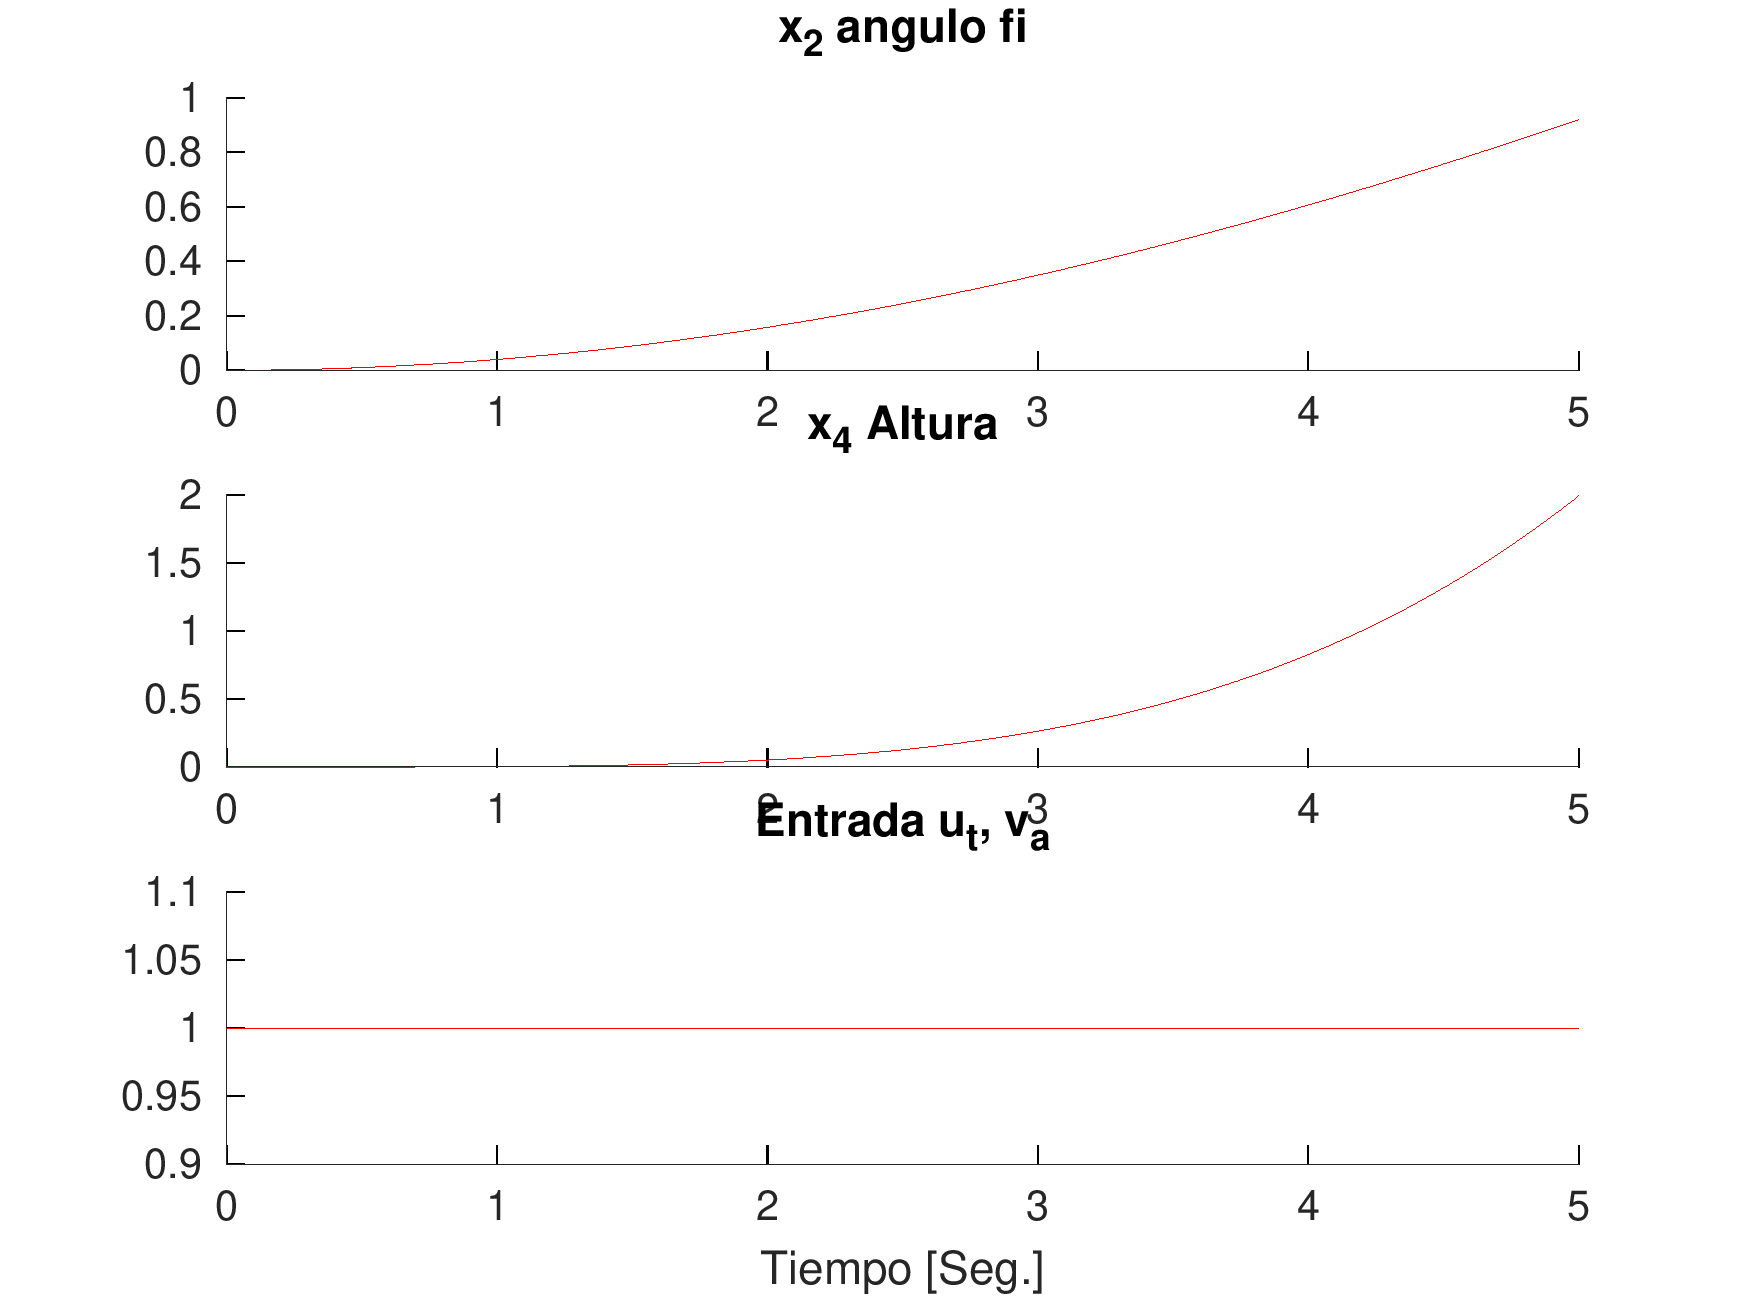

In [29]:
from PIL import Image
imt = Image.open("/content/VarsAvion_temporal_1.png")
imt

# SOLUCION NUMERICA - 2
$\omega$=0,2; a=0,01; b=2; c=50 m/s, (es decir, 180Km/h),
$\Delta$t=10-3; y el tiempo de simulación de 20 segundos

In [14]:
%%writefile Avion_Num_2.m
clc;clear all;
warning('off','all');
X=-[0; 0;0;0];t_etapa=10e-3;
tF=20;  % segundos simulacion
color_='r';
color='b';
Ts=t_etapa;
u=1;
ii=0;
for t=0:t_etapa:tF
  ii=ii+1;
  x1(ii)=X(1);%Ángulo alfa
  x2(ii)=X(2);%Ángulo fi
  x4(ii)=X(4);%Altura del avión, con respecto altura crucero
  X=modavion_2(t_etapa, X, u);
  acc(ii)=u;
end
t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(4,1,1);hold on;
plot(t,x1,color_);title('x_1 angulo alfa'); hold on;
subplot(4,1,2);hold on;
plot(t,x2,color_);title('x_2 angulo fi'); hold on;
subplot(4,1,3);hold on;
plot(t,x4,color_);title('x_4 Altura');
subplot(4,1,4);hold on;
plot(t,acc,color_);title('Entrada u_t, v_a');
xlabel('Tiempo [Seg.]');
print(hfig1,'VarsAvion_temporal_2','-r300','-dpng');
save('Verificacion_Num_1Avion_2.mat','-v7');

Overwriting Avion_Num_2.m


In [15]:
%%writefile modavion_2.m
%Funcion modelo
function [X]=modavion_2(t_etapa, xant, accion)
%xant=[alfa,fi,fi_p,h] -> [x1,x2,x3,x4]
a=0.01; b=2; c=50; omega=0.2;
At=1e-3;
u=accion;
x=xant;
for ii=1:t_etapa/At
  A = [ -a , a , 0 , 0 ; 0 , 0 , 1 , 0 ; omega^2 , -omega^2 , 0 , 0 ; c , 0 , 0 , 0 ];
  B = [ 0 ; 0 ; omega^2*b ; 0];
  xp = A * x + B * u;
  x=x+xp*At;
end
X=[x];

Overwriting modavion_2.m


In [16]:
# -W : no window system
!octave -W Avion_Num_2.m


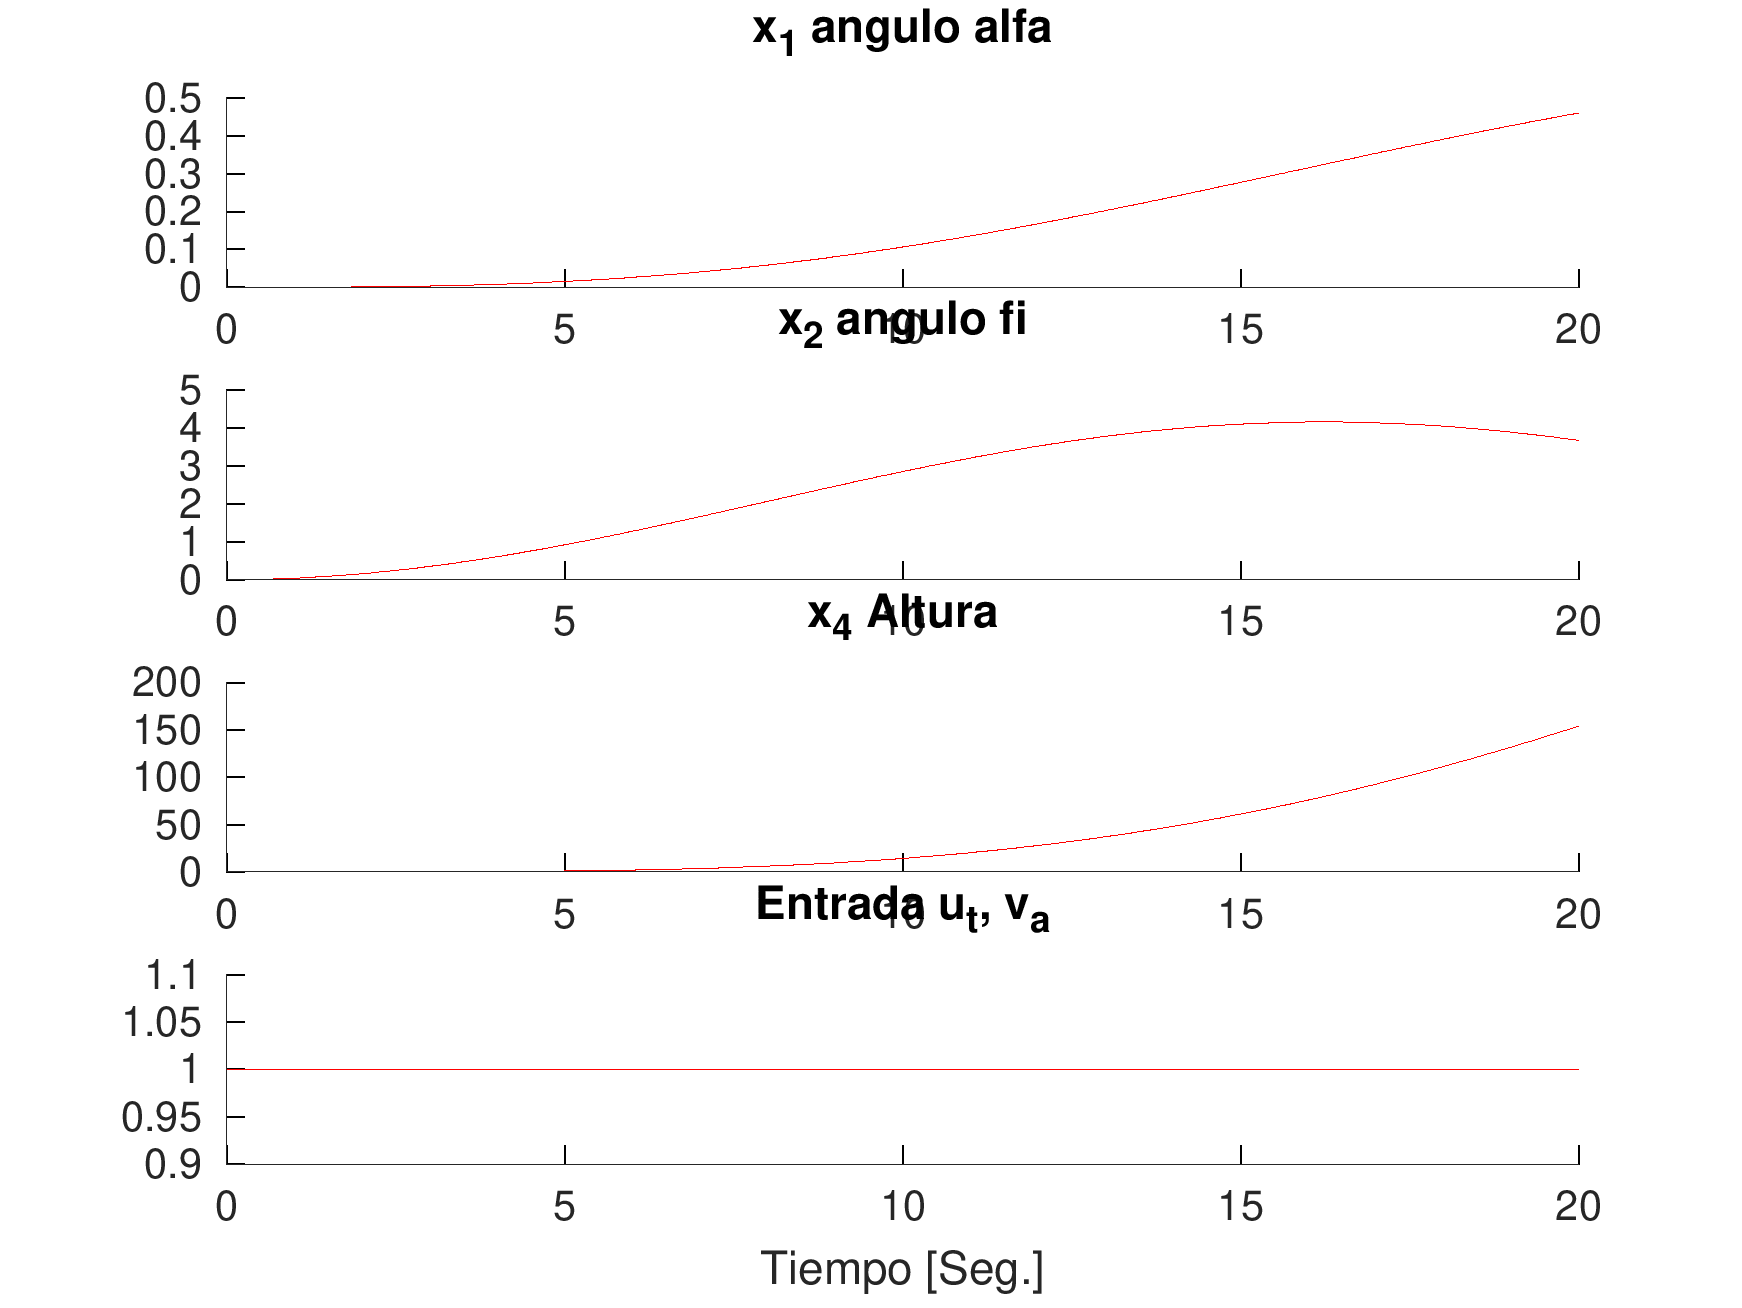

In [17]:
from PIL import Image
imt = Image.open("/content/VarsAvion_temporal_2.png")
imt